In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import torch.optim as optim
import time

In [80]:
# Helper functions
def predict(X, W):
    b = np.ones((X.shape[0], 1))
    X = np.concatenate([X, b], axis = 1)
    YPred = X.dot(W)
    return YPred

def plot(X, Y, YPredict, label):
    plt.figure(figsize=(9, 6))
    plt.title(label)
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.scatter(X, Y,  color='black', label = 'Actual')
    plt.plot(X, YPredict, color='blue', linewidth=3, label = 'Prediction')
    plt.xticks(())
    plt.yticks(())
    plt.legend()
    plt.show()
    
    
def plotObjective(X, title):
    plt.plot(X, label = 'Objective Function')
    plt.title(title)
    plt.show()
    
def runAlgo(X, Y, algo, steps = 5, parallel = False):

    admm = optim.ADMM([X, Y, 0.01, 1], algo, parallel = parallel)

    #print(admm.getLoss())
    # start = time.time()
    oVals = []
    for i in xrange(0, steps):
        s = admm.step()
        oVals.append(s)
        print('Objective Value:', s)
    #end = time.time()
    #admmTime = end - start
    #print('Time taken', end - start)

    #print('Weights: ',admm.getWeights())
    W = admm.getParams()
    return W, oVals

def lassoObjective(W, X, b, alpha):
    return 0.5 * np.linalg.norm(W.dot(X) - b)**2 + alpha *  np.linalg.norm(X, 1)

def ridgeObjective(W, X, b, alpha):
    return 0.5 * np.linalg.norm(W.dot(X) - b)**2 + alpha *  np.linalg.norm(X, 2)

In [62]:
# num_iterations = 5
# N = 10000
# D = 10

# X = np.random.randn(N, D)
# Y = np.random.randn(N, 1)

In [63]:
# print(X.shape)

In [64]:
# Load the diabetes dataset
diabetes = datasets.load_diabetes()

# Use only one feature
diabetes_X = diabetes.data[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

In [65]:
#print(diabetes)

In [66]:
# diabetes_X_train = X[:-20]
# diabetes_X_test = X[-20:]
# diabetes_y_train = Y[:-20]
# diabetes_y_test = Y[-20:]

(array([948.42155875]), 2.3283064365386963e-10, 171.0893722419929, 2)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
(array([876.5629941]), -2.3283064365386963e-10, 161.86896939501779, 2)
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
(array([986.21146564]), 0.0, 168.27644964539007, 2)
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
('Time taken', 0.08002400398254395)
Mean squared error: 2548.08
Variance score: 0.47


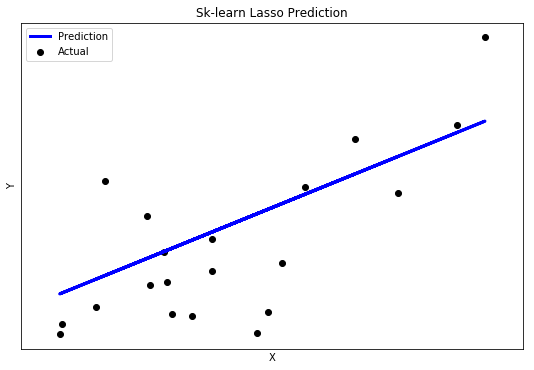

In [90]:
# Run Lasso

alpha = 0.00001
lasso = linear_model.LassoCV(alphas=[alpha], verbose = 1000)

start = time.time()
lfit = lasso.fit(diabetes_X_train, diabetes_y_train)
end = time.time()
diabetes_y_pred = lfit.predict(diabetes_X_test)

skTime = end- start
print('Time taken', end - start)
# The coefficients
#print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plot(diabetes_X_test, diabetes_y_test, diabetes_y_pred, "Sk-learn Lasso Prediction")

In [91]:
sk_w = np.array([944.21977, 872.06439, 981.638155])
# sk_b = np.array([2, 2, 2])
sk_b = np.array([2.3283064365386963e-10, -2.3283064365386963e-10, 0.0])
for w, b in zip(sk_w, sk_b):
    print(lassoObjective(np.array(w), diabetes_X_train, np.array(b), alpha))

426062.4750095874
363432.8775282069
460500.35363853065


In [77]:
# Create linear regression object

alpha = 0.01
#lasso = linear_model.LassoCV(alphas=[alpha], verbose = 10)

#start = time.time()
lfit = linear_model.lasso_path(diabetes_X_train, diabetes_y_train, alphas=[alpha], verbose = 10)
#end = time.time()
#diabetes_y_pred = lfit.predict(diabetes_X_test)

skTime = end- start
print('Time taken', end - start)
# The coefficients
#print('Coefficients: \n', regr.coef_)
# The mean squared error
#print("Mean squared error: %.2f"
#      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# Explained variance score: 1 is perfect prediction
#print('Variance score: %.2f' % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
#plot(diabetes_X_test, diabetes_y_test, diabetes_y_pred, "Sk-learn Lasso Prediction")

(array([965.75198079]), 0.0, 1243.5769, 2)
('Time taken', 0.01669597625732422)


In [68]:
lasso.get_params().keys()

['normalize',
 'alphas',
 'n_jobs',
 'verbose',
 'fit_intercept',
 'selection',
 'positive',
 'n_alphas',
 'max_iter',
 'eps',
 'precompute',
 'random_state',
 'tol',
 'copy_X',
 'cv']

('Objective Value:', 983261.463164293)
('Objective Value:', 897668.6203126734)
('Objective Value:', 868007.8413340384)
('Objective Value:', 856511.319478526)
('Objective Value:', 851592.7846565667)
('Objective Value:', 849327.9824983742)
('Objective Value:', 848234.7107673415)
('Objective Value:', 847692.2511785958)
('Objective Value:', 847418.9980950987)
('Objective Value:', 847280.2432261793)
('Objective Value:', 847209.4891767501)
('Objective Value:', 847173.3318901183)
('Objective Value:', 847154.8338783506)
('Objective Value:', 847145.3648987642)
('Objective Value:', 847140.5163812094)
('Objective Value:', 847138.0333613176)
('Objective Value:', 847136.7616604941)
('Objective Value:', 847136.1103217956)
('Objective Value:', 847135.7767129098)
('Objective Value:', 847135.6058401458)
('Weights: ', array([[780.45964671],
       [151.14402181]]))
Mean squared error: 2715.74
Variance score: 0.44


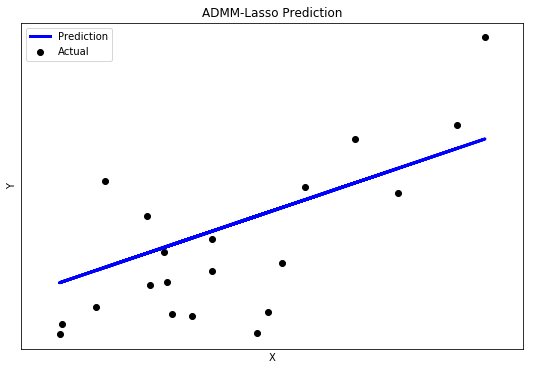

In [71]:
X = diabetes_X_train
Y = diabetes_y_train

b = np.ones((X.shape[0], 1))
X = np.concatenate([X, b], axis = 1)
Y = Y.reshape(-1, 1)

W, oVals = runAlgo(X, Y, "Lasso", 20)

print('Weights: ', W)

# Comparison with Scikit - LR
admm_predict = predict(diabetes_X_test, W)

print("Mean squared error: %.2f"
      % mean_squared_error(diabetes_y_test, admm_predict))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(diabetes_y_test, admm_predict))

plot(diabetes_X_test, diabetes_y_test, admm_predict, "ADMM-Lasso Prediction")

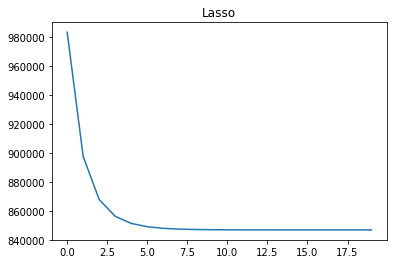

In [70]:
plotObjective(oVals, "Lasso")

(2, 20)


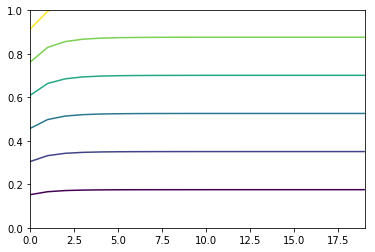

In [52]:
v = np.arange(20)
o = np.array(oVals)
v2 = np.array([v, o])
print(v2.shape)
plt.contour(v2)

Mean squared error: 2559.32
Variance score: 0.47


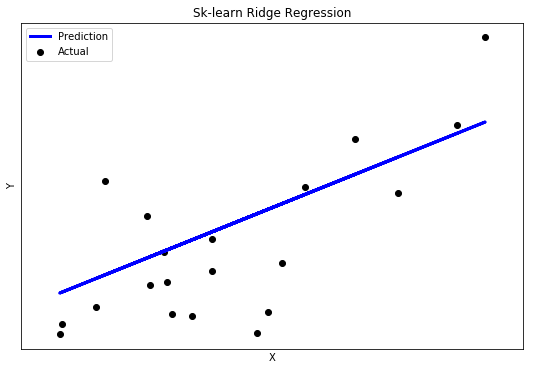

In [16]:
ridge = linear_model.Ridge(alpha=alpha)
ridge.fit(diabetes_X_train, diabetes_y_train)

diabetes_y_pred = ridge.predict(diabetes_X_test)
print("Mean squared error: %.2f"
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plot(diabetes_X_test, diabetes_y_test, diabetes_y_pred, "Sk-learn Ridge Regression")

Mean squared error: 2746.21
Variance score: 0.43


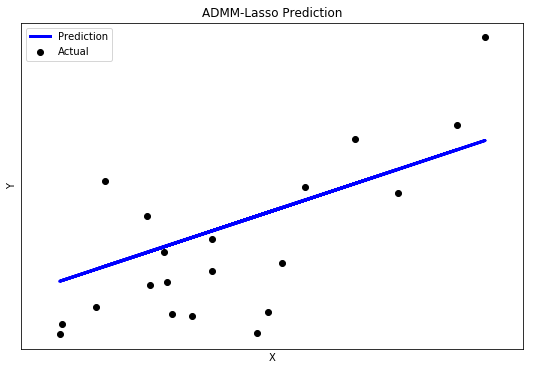

In [36]:
X = diabetes_X_train
Y = diabetes_y_train

b = np.ones((X.shape[0], 1))
X = np.concatenate([X, b], axis = 1)
Y = Y.reshape(-1, 1)

W, oVals = runAlgo(X, Y, "Ridge", 20)

# Comparison with Scikit - LR
admm_predict = predict(diabetes_X_test, W)

print("Mean squared error: %.2f"
      % mean_squared_error(diabetes_y_test, admm_predict))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(diabetes_y_test, admm_predict))

plot(diabetes_X_test, diabetes_y_test, admm_predict, "ADMM-Lasso Prediction")

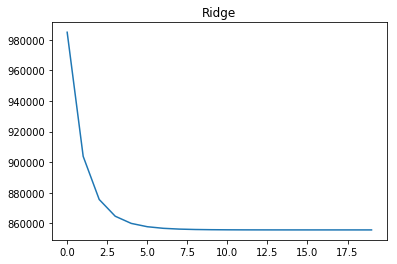

In [42]:
plotObjective(oVals, "Ridge")